In [1]:
import os
import sys
import csv
import json
import io
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score    
sources_path = './sources'
if sources_path not in sys.path:
    sys.path.append(sources_path)
import utils
from funk_svd.svd import SVD
import mab
import joblib
import pickle
from IPython.display import clear_output

progbar = utils.ProgressBar(elapsed_time=True)

palette = "purple",
second_palette = ["#60489D", "#46BB93", "#F9B74D", "#2D2D2D", "#9F1253", "#A9A8A8", "#56DCE3", "#4260AD"]

In [2]:
## Variables
root_path = ''
cvsRandomFile = 'DataWithRandom.csv'
profile = 'Profile.csv'
sources_path = './sources'
config = utils.load_json_file(os.path.join(sources_path, "config.json"))

In [3]:
dataSetOriginal = pd.read_csv(root_path + cvsRandomFile)
dataSetOriginal

,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,poc_image,segment,sub_segment,Product Set,Brand,Sub-Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019 Product,Tax,province,Discount_Total,Visit_Count,Purchase_Count
0,29000310,0.480,0.557,Tier 0,Mainstream,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,141.20,0.00,0.00,0.480,12.23,Brussels Capital Region,0.00,68,91
1,29000419,0.450,0.540,Tier 1,Mainstream,Not applicable,Not applicable,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE,PIEDBOEUF,PIEDBOEUF TRIPLE,BOTTLE,RETURNABLE,113.65,0.00,0.00,0.450,7.85,Liège,0.00,54,100
2,29000430,270.970,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.00,238.570,3577.69,Antwerp,14511.46,94,57
3,29000430,270.970,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,6001.00,1425.19,180.00,20.400,519.41,Antwerp,1605.19,36,62
4,29000430,270.970,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,RETURNABLE,3051.36,718.32,0.00,12.000,288.63,Antwerp,718.32,39,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39840,29949511,48.853,1.241,Tier 2,Mainstream,Drink Led,Bar,RETURNABLE_BOTTLE_TRIPEL KARMELIET_TRIPEL KARM...,TRIPEL KARMELIET,TRIPEL KARMELIET,BOTTLE,RETURNABLE,613.76,68.06,201.76,1.583,65.69,Luxembourg,269.82,1,53
39841,29950463,0.000,0.000,Tier 2,0,Wholesaler,Wholesaler,RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN ROSEE,HOEGAARDEN,HOEGAARDEN ROSEE,BOTTLE,RETURNABLE,0.00,0.00,0.00,0.000,0.00,Hainaut,0.00,36,14
39842,29950463,0.000,0.000,Tier 2,0,Wholesaler,Wholesaler,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,0.00,0.00,0.00,0.000,0.00,Hainaut,0.00,10,84
39843,29950463,0.000,0.000,Tier 2,0,Wholesaler,Wholesaler,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF FONCEE,PIEDBOEUF,PIEDBOEUF FONCEE,BOTTLE,RETURNABLE,0.00,0.00,0.00,0.000,0.00,Hainaut,0.00,86,98


In [4]:
train_data = dataSetOriginal

In [5]:
#tratar dados
train_data['sfdc_tier']= train_data['sfdc_tier'].replace(["Tier 1"],1)
train_data['sfdc_tier']= train_data['sfdc_tier'].replace(["Tier 0"],0)
train_data['sfdc_tier']= train_data['sfdc_tier'].replace(["Tier 2"],2)
train_data['poc_image']= train_data['poc_image'].replace(["Mainstream"],1)
train_data['poc_image']= train_data['poc_image'].replace(["Premium"],2)

train_data['segment']= train_data['segment'].replace(["Not applicable"],0)
train_data['segment']= train_data['segment'].replace(["Entertainment Led"],1)
train_data['segment']= train_data['segment'].replace(["Drink Led"],2)
train_data['segment']= train_data['segment'].replace(["Institutional"],3)
train_data['segment']= train_data['segment'].replace([" "],99)
train_data['segment']= train_data['segment'].replace(["Food Led"],4)
train_data['segment']= train_data['segment'].replace(["Entertainment"],5)
train_data['segment']= train_data['segment'].replace(["Wholesaler"],6)
del train_data['sub_segment']
del train_data['Product Set']

train_data['Brand']= train_data['Brand'].replace(["JUPILER"],1)
train_data['Brand']= train_data['Brand'].replace(["PIEDBOEUF"],2)
train_data['Brand']= train_data['Brand'].replace(["DIEKIRCH"],3)
train_data['Brand']= train_data['Brand'].replace(["BELLE VUE"],4)
train_data['Brand']= train_data['Brand'].replace(["HOEGAARDEN"],5)
train_data['Brand']= train_data['Brand'].replace(["LEFFE"],4)
train_data['Brand']= train_data['Brand'].replace(["TRIPEL KARMELIET"],5)
train_data['Brand']= train_data['Brand'].replace(["GOOSE ISLAND"],6)
train_data['Brand']= train_data['Brand'].replace(["STELLA ARTOIS"],7)
train_data['Brand']= train_data['Brand'].replace(["CORONA"],8)
train_data['Brand']= train_data['Brand'].replace(["VIEUX TEMPS"],9)
train_data['Brand']= train_data['Brand'].replace(["SCOTCH CTS"],10)
train_data['Brand']= train_data['Brand'].replace(["PURE BLONDE"],11)
train_data['Brand']= train_data['Brand'].replace(["CUBANISTO"],12)
train_data['Brand']= train_data['Brand'].replace(["GINETTE"],13)
train_data['Brand']= train_data['Brand'].replace(["KWAK"],14)
train_data['Brand']= train_data['Brand'].replace(["BASS"],15)
train_data['Brand']= train_data['Brand'].replace(["KRUGER"],16)
train_data['Brand']= train_data['Brand'].replace(["HORSE ALE"],17)
train_data['Brand']= train_data['Brand'].replace(["GINDER-ALE"],18)
train_data['Brand']= train_data['Brand'].replace(["DEUS"],19)
train_data['Brand']= train_data['Brand'].replace(["SAFIR"],20)
train_data['Brand']= train_data['Brand'].replace(["BIRRA DEL BORGO"],21)

del train_data['Sub-Brand']

train_data['Pack_Type']= train_data['Pack_Type'].replace(["BOTTLE"],1)
train_data['Pack_Type']= train_data['Pack_Type'].replace(["BULK"],2)
train_data['Pack_Type']= train_data['Pack_Type'].replace(["KEG"],3)
train_data['Pack_Type']= train_data['Pack_Type'].replace(["CAN"],4)
train_data['Pack_Type']= train_data['Pack_Type'].replace(["PERFECTDRAFT"],5)

train_data['Returnalility']= train_data['Returnalility'].replace(["RETURNABLE"],1)
train_data['Returnalility']= train_data['Returnalility'].replace(["OW"],0)

del train_data['province']

# fim tratar dados#

train_data.head()
#train_data.info()

,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,poc_image,segment,Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019 Product,Tax,Discount_Total,Visit_Count,Purchase_Count
0,29000310,0.48,0.557,0,1,1,1,1,1,141.20,0.00,0.0,0.48,12.23,0.00,68,91
1,29000419,0.45,0.540,1,1,0,2,1,1,113.65,0.00,0.0,0.45,7.85,0.00,54,100
2,29000430,270.97,225.720,1,1,2,1,2,0,61551.06,14511.46,0.0,238.57,3577.69,14511.46,94,57
3,29000430,270.97,225.720,1,1,2,1,1,1,6001.00,1425.19,180.0,20.40,519.41,1605.19,36,62
4,29000430,270.97,225.720,1,1,2,1,3,1,3051.36,718.32,0.0,12.00,288.63,718.32,39,36


In [6]:
train_data.head()

,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,poc_image,segment,Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019 Product,Tax,Discount_Total,Visit_Count,Purchase_Count
0,29000310,0.48,0.557,0,1,1,1,1,1,141.20,0.00,0.0,0.48,12.23,0.00,68,91
1,29000419,0.45,0.540,1,1,0,2,1,1,113.65,0.00,0.0,0.45,7.85,0.00,54,100
2,29000430,270.97,225.720,1,1,2,1,2,0,61551.06,14511.46,0.0,238.57,3577.69,14511.46,94,57
3,29000430,270.97,225.720,1,1,2,1,1,1,6001.00,1425.19,180.0,20.40,519.41,1605.19,36,62
4,29000430,270.97,225.720,1,1,2,1,3,1,3051.36,718.32,0.0,12.00,288.63,718.32,39,36


In [7]:
auxFile = train_data

In [8]:

auxFile

,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,poc_image,segment,Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019 Product,Tax,Discount_Total,Visit_Count,Purchase_Count
0,29000310,0.480,0.557,0,1,1,1,1,1,141.20,0.00,0.00,0.480,12.23,0.00,68,91
1,29000419,0.450,0.540,1,1,0,2,1,1,113.65,0.00,0.00,0.450,7.85,0.00,54,100
2,29000430,270.970,225.720,1,1,2,1,2,0,61551.06,14511.46,0.00,238.570,3577.69,14511.46,94,57
3,29000430,270.970,225.720,1,1,2,1,1,1,6001.00,1425.19,180.00,20.400,519.41,1605.19,36,62
4,29000430,270.970,225.720,1,1,2,1,3,1,3051.36,718.32,0.00,12.000,288.63,718.32,39,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39840,29949511,48.853,1.241,2,1,2,5,1,1,613.76,68.06,201.76,1.583,65.69,269.82,1,53
39841,29950463,0.000,0.000,2,0,6,5,1,1,0.00,0.00,0.00,0.000,0.00,0.00,36,14
39842,29950463,0.000,0.000,2,0,6,1,1,1,0.00,0.00,0.00,0.000,0.00,0.00,10,84
39843,29950463,0.000,0.000,2,0,6,2,1,1,0.00,0.00,0.00,0.000,0.00,0.00,86,98


**Obter IDs unicos de estabelecimentos**

In [9]:
# sorting by first name
auxFile = train_data
auxFile.sort_values("Ship-to ID", inplace = True)
# dropping ALL duplicate values
#auxFile.dropDuplicates(['Ship-to ID']).show()
auxFile.drop_duplicates(subset ="Ship-to ID", keep = 'first', inplace = True)
# removing other columns
auxFile.drop(auxFile.columns[[4,6,7,8,9,10,11,12,13,14]], axis=1,inplace=True)
# displaying data
auxFile.head

<bound method NDFrame.head of        Ship-to ID  Volume_2019  ...  Visit_Count  Purchase_Count
0        29000310        0.480  ...           68              91
1        29000419        0.450  ...           54             100
2        29000430      270.970  ...           94              57
5        29000485       29.610  ...           25               4
10       29000699        0.420  ...            4              54
...           ...          ...  ...          ...             ...
39802    29949335       15.400  ...           90              51
39803    29949357        0.420  ...           21              78
39805    29949393        1.000  ...           94              27
39825    29949511       48.853  ...           94              91
39842    29950463        0.000  ...           10              84

[4568 rows x 7 columns]>

In [10]:
auxFile

,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,segment,Visit_Count,Purchase_Count
0,29000310,0.480,0.557,0,1,68,91
1,29000419,0.450,0.540,1,0,54,100
2,29000430,270.970,225.720,1,2,94,57
5,29000485,29.610,25.860,2,3,25,4
10,29000699,0.420,0.505,2,3,4,54
...,...,...,...,...,...,...,...
39802,29949335,15.400,3.200,2,1,90,51
39803,29949357,0.420,1.500,1,3,21,78
39805,29949393,1.000,1.988,0,1,94,27
39825,29949511,48.853,1.241,2,2,94,91


**Gerar dados adicionais = media de compra atraves de visita e numero de contas e quando se tornou membro**

In [11]:
# combining Visit_Count and Purchase_Count into Buying_Average
auxFile['Buying_Average'] = auxFile['Purchase_Count'] / auxFile['Visit_Count']
auxFile.drop(columns=['Visit_Count','Purchase_Count'], axis=1,inplace=True)
auxFile

,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,segment,Buying_Average
0,29000310,0.480,0.557,0,1,1.338235
1,29000419,0.450,0.540,1,0,1.851852
2,29000430,270.970,225.720,1,2,0.606383
5,29000485,29.610,25.860,2,3,0.160000
10,29000699,0.420,0.505,2,3,13.500000
...,...,...,...,...,...,...
39802,29949335,15.400,3.200,2,1,0.566667
39803,29949357,0.420,1.500,1,3,3.714286
39805,29949393,1.000,1.988,0,1,0.287234
39825,29949511,48.853,1.241,2,2,0.968085


In [12]:
auxFile = auxFile.reset_index()

In [13]:
# adding Became_Member_on
import random
auxFile['Became_Member_on'] = 0
random.seed(10)
random_dates = {}
length = len(auxFile)
for i in range(length):
  year = (str(random.randint(2000,2019)))
  month = (str(random.randint(1,12)))
  if len(month)==1:
    month = '0' + month
  day = (str(random.randint(1,30)))
  if len(day)==1:
    day = '0'+day
  random_dates[i] = (year+month+day)

for i in range(length):
  auxFile['Became_Member_on'][i]= random_dates[i]
auxFile

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,segment,Buying_Average,Became_Member_on
0,0,29000310,0.480,0.557,0,1,1.338235,20180114
1,1,29000419,0.450,0.540,1,0,1.851852,20151001
2,2,29000430,270.970,225.720,1,2,0.606383,20060827
3,5,29000485,29.610,25.860,2,3,0.160000,20150521
4,10,29000699,0.420,0.505,2,3,13.500000,20050117
...,...,...,...,...,...,...,...,...
4563,39802,29949335,15.400,3.200,2,1,0.566667,20140105
4564,39803,29949357,0.420,1.500,1,3,3.714286,20180314
4565,39805,29949393,1.000,1.988,0,1,0.287234,20140715
4566,39825,29949511,48.853,1.241,2,2,0.968085,20060708


Obter produto favorito


In [14]:
auxFile2 = pd.read_csv(root_path + cvsRandomFile)

del auxFile2['Volume_2019']
del auxFile2['Volume_2018']
del auxFile2['poc_image']
del auxFile2['segment']
del auxFile2['sub_segment']
del auxFile2['Brand']
del auxFile2['Sub-Brand']
del auxFile2['Pack_Type']
del auxFile2['OnInvoice Discount(LCU)']
del auxFile2['OffInvoice Discount(LCU)']
del auxFile2['Tax']
del auxFile2['province']
del auxFile2['Discount_Total']
del auxFile2['Visit_Count']
del auxFile2['Purchase_Count']
del auxFile2['sfdc_tier']
del auxFile2['GTO_2019']
del auxFile2['Returnalility']
auxFile2.rename({"Ship-to ID": "estabelecimento"}, axis=1, inplace=True)
auxFile2 = auxFile2.groupby('estabelecimento', sort=False).agg({'Volume_2019 Product': 'max', 'Product Set': 'first'})
auxFile2.reset_index()

,estabelecimento,Volume_2019 Product,Product Set
0,29000310,0.480,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS
1,29000419,0.450,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE
2,29000430,238.570,OW_BULK_JUPILER_JUPILER PILS
3,29000485,17.370,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0
4,29000699,0.360,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0
...,...,...,...
4563,29949335,15.400,RETURNABLE_KEG_STELLA ARTOIS_STELLA ARTOIS REG...
4564,29949357,0.240,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS
4565,29949393,1.000,RETURNABLE_KEG_GINETTE_ GINETTE LAGER
4566,29949511,26.435,OW_BOTTLE_CORONA_CORONA EXTRA


In [15]:
auxFile2.reset_index(inplace=True, drop=True)
auxFile2

,Volume_2019 Product,Product Set
0,0.480,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS
1,0.450,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE
2,238.570,OW_BULK_JUPILER_JUPILER PILS
3,17.370,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0
4,0.360,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0
...,...,...
4563,15.400,RETURNABLE_KEG_STELLA ARTOIS_STELLA ARTOIS REG...
4564,0.240,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS
4565,1.000,RETURNABLE_KEG_GINETTE_ GINETTE LAGER
4566,26.435,OW_BOTTLE_CORONA_CORONA EXTRA


In [16]:
# add most wanted product from auxFile2 to auxFile
auxFile['Volume_2019_MWP'] = auxFile2['Volume_2019 Product']
auxFile['Most_Wanted_Product(MWP)'] = auxFile2['Product Set']
auxFile

,index,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,segment,Buying_Average,Became_Member_on,Volume_2019_MWP,Most_Wanted_Product(MWP)
0,0,29000310,0.480,0.557,0,1,1.338235,20180114,0.480,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS
1,1,29000419,0.450,0.540,1,0,1.851852,20151001,0.450,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE
2,2,29000430,270.970,225.720,1,2,0.606383,20060827,238.570,OW_BULK_JUPILER_JUPILER PILS
3,5,29000485,29.610,25.860,2,3,0.160000,20150521,17.370,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0
4,10,29000699,0.420,0.505,2,3,13.500000,20050117,0.360,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0
...,...,...,...,...,...,...,...,...,...,...
4563,39802,29949335,15.400,3.200,2,1,0.566667,20140105,15.400,RETURNABLE_KEG_STELLA ARTOIS_STELLA ARTOIS REG...
4564,39803,29949357,0.420,1.500,1,3,3.714286,20180314,0.240,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS
4565,39805,29949393,1.000,1.988,0,1,0.287234,20140715,1.000,RETURNABLE_KEG_GINETTE_ GINETTE LAGER
4566,39825,29949511,48.853,1.241,2,2,0.968085,20060708,26.435,OW_BOTTLE_CORONA_CORONA EXTRA


In [17]:
# CREATE A REWARD DATABASE
rewardData = pd.DataFrame(auxFile['Ship-to ID'].copy())
rewardData

,Ship-to ID
0,29000310
1,29000419
2,29000430
3,29000485
4,29000699
...,...
4563,29949335
4564,29949357
4565,29949393
4566,29949511


In [18]:
# add random 'discount_id'; 'discount_viewed'; 'discount_used'; 'purchase_completed'; 'Future_Purchase'; 'discount_reward'
import random
columnsToAdd = ['discount_viewed', 'discount_used', 'purchase_completed', 'Future_Purchase']
rewardData['discount_id'] = 0
rewardData['discount_viewed'] = 0
rewardData['discount_used'] = 0
rewardData['purchase_completed'] = 0
rewardData['Future_Purchase'] = 0
rewardData['discount_reward'] = 0
random.seed(10)
ctaLength = len(columnsToAdd)
rdLength = len(rewardData)
#  rewardData['discount_id'][i] = (str(uuid.uuid4()))
# add discount_id
for i in range(rdLength):
  rewardData['discount_id'][i] = (str(random.randint(0,10)))
# add 0-1
for x in range(ctaLength):
  for i in range(rdLength):
    rewardData[columnsToAdd[x]][i] = (str(random.randint(0,1)))
# add discount_reward
for i in range(rdLength):
  rewardData['discount_reward'][i] = (str(random.randint(1,10)))

rewardData

,Ship-to ID,discount_id,discount_viewed,discount_used,purchase_completed,Future_Purchase,discount_reward
0,29000310,9,0,0,0,0,2
1,29000419,0,1,0,0,0,9
2,29000430,6,1,0,1,0,1
3,29000485,7,1,1,0,1,8
4,29000699,9,0,1,0,0,4
...,...,...,...,...,...,...,...
4563,29949335,4,0,0,1,1,6
4564,29949357,5,0,0,1,0,1
4565,29949393,9,1,1,0,1,7
4566,29949511,8,1,1,1,0,2


In [19]:
auxFile3 = auxFile
auxFile3['Most_Wanted_Product(MWP)'].value_counts()

OW_BOTTLE_CORONA_CORONA EXTRA                        802
RETURNABLE_BOTTLE_BELLE VUE_BELLE VUE EXTRA KRIEK    554
RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN WHITE        425
RETURNABLE_BOTTLE_JUPILER_JUPILER PILS               374
RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0                278
                                                    ... 
OW_CAN_LEFFE_LEFFE BRUNE                               1
RETURNABLE_BOTTLE_KWAK_KWAK                            1
RETURNABLE_BOTTLE_KRUGER_KRUGER EXPORT                 1
OW_CAN_HOEGAARDEN_ HOEGAARDEN RADLER AGRUM 0.0         1
RETURNABLE_KEG_HOEGAARDEN_HOEGAARDEN JULIUS            1
Name: Most_Wanted_Product(MWP), Length: 96, dtype: int64

In [20]:
auxFile3.head()

,index,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,segment,Buying_Average,Became_Member_on,Volume_2019_MWP,Most_Wanted_Product(MWP)
0,0,29000310,0.48,0.557,0,1,1.338235,20180114,0.48,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS
1,1,29000419,0.45,0.540,1,0,1.851852,20151001,0.45,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE
2,2,29000430,270.97,225.720,1,2,0.606383,20060827,238.57,OW_BULK_JUPILER_JUPILER PILS
3,5,29000485,29.61,25.860,2,3,0.160000,20150521,17.37,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0
4,10,29000699,0.42,0.505,2,3,13.500000,20050117,0.36,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0


Tratar produtos preferidos dos estabelecimentos

In [21]:
auxFile3 = auxFile
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_JUPILER_JUPILER PILS"],1)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE"],2)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BULK_JUPILER_JUPILER PILS"],3)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_JUPILER_JUPILER PILS"],4)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0"],5)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF FONCEE"],6)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_BELLE VUE_BELLE VUE EXTRA KRIEK"],7)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF BLONDE"],8)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_JUPILER_JUPILER PILS"],8)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_GOOSE ISLAND_GOOSE ISLAND IPA"],9)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN ROSEE"],10)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_CORONA_CORONA EXTRA"],11)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_BASS_BASS PALE ALE"],12)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_LEFFE_LEFFE RITUEL 9░"],13)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_DIEKIRCH_DIEKIRCH PILS"],14)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_CUBANISTO_CUBANISTO RUM"],15)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_PERFECTDRAFT_LEFFE_FLAVOURED ALCOHOLIC"],16)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_LEFFE BLONDE"],17)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_BELLE VUE_BELLE VUE KRIEK CLASSIQUE"],18)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_STELLA ARTOIS_STELLA ARTOIS REGULAR"],19)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_JUPILER_JUPILER 0.0"],20)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_STELLA ARTOIS_STELLA ARTOIS REGULAR"],21)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN WHITE"],22)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_TRIPEL KARMELIET_TRIPEL KARMELIET"],23)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_STELLA ARTOIS_STELLA ARTOIS REGULAR"],24)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_HOEGAARDEN_HOEGAARDEN ROSEE"],25)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEG RADLER LEMON 0.0"],26)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_BELLE VUE_BELLE VUE GUEUZE"],27)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_LEFFE"],28)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN GRAND CRU"],29)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_GINETTE_GINETTE FRUIT"],30)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN ROSE 0.0"],31)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_HOEGAARDEN_HOEGAARDEN WHITE"],32)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_STELLA ARTOIS_STELLA ARTOIS REGULAR"],33)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_GINETTE_GINETTE BLONDE"],34)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_GINETTE_ GINETTE LAGER"],35)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_LEFFE_LEFFE RUBY"],36)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_CUBANISTO_CUBANISTO RUM"],37)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN JULIUS"],38)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_HOEGAARDEN_HOEGAARDEN ROSEE"],39)

auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_HOEGAARDEN_HOEGAARDEN 0.0"],40)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_FLAVOURED ALCOHOLIC"],41)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_GINETTE_GINETTE BLANCHE"],42)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN 0.0"],43)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN FORBIDDEN FRUIT"],44)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_KWAK_KWAK"],45)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_KRUGER_KRUGER EXPORT"],46)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HORSE ALE_HORSE ALE"],47)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_HOEGAARDEN_HOEG RADLER LEMON 0.0"],48)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_HOEGAARDEN_HOEGAARDEN ROSE 0.0"],49)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_DEUS_DEUS"],50)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN BEATRIX"],51)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_GINETTE_GINETTE BLANCHE"],52)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_GINETTE_GINETTE TRIPEL"],53)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BULK_STELLA ARTOIS_STELLA ARTOIS REGULAR"],54)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_BELLE VUE_BELLE VUE EXTRA KRIEK"],55)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_JUPILER_JUPILER BLUE"],56)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_LEFFE BRUNE"],57)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_LEFFE SANS ALCOOL/ALCOHOLVRIJ"],58)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_BELLE VUE_BELLE VUE EXTRA KRIEK"],59)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_LEFFE_LEFFE BLONDE"],60)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_LEFFE_LEFFE BLONDE"],61)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_JUPILER_JUPILER BLUE"],62)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_LEFFE_LEFFE BRUNE"],63)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_BIRRA DEL BORGO_BIRRA DEL BORGO CASTAGNALE"],64)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_LEFFE_LEFFE SANS ALCOOL/ALCOHOLVRIJ"],65)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_DIEKIRCH_DIEKIRCH GRAND CRU"],66)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_HOEGAARDEN_HOEGAARDEN WHITE"],67)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_TRIPEL KARMELIET_TRIPEL KARMELIET"],68)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_JUPILER_JUPILER PILS"],69)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_CUBANISTO_CUBANISTO PHENOMENAL"],70)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_GINDER-ALE_GINDER-ALE"],71)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN YELLOW"],80)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_LEFFE_LEFFE BLONDE"],81)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_LEFFE_LEFFE BRUNE"],82)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_LEFFE RITUEL 9░"],83)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_SCOTCH CTS_SCOTCH CTS"],84)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_PURE BLONDE_PURE BLONDE REGULAR"],85)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_HOEGAARDEN_ HOEGAARDEN RADLER AGRUM 0.0"],86)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_LEFFE_LEFFE"],87)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_PERFECTDRAFT_JUPILER_JUPILER PILS"],88)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_CUBANISTO_CUBANISTO RUM"],89)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_BELLE VUE_BELLE VUE GUEUZE"],90)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_LEFFE_LEFFE TRIPLE"],91)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_PERFECTDRAFT_HOEGAARDEN_HOEGAARDEN WHITE"],92)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_JUPILER_JUPILER 0.0"],93)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_PERFECTDRAFT_LEFFE_LEFFE BLONDE"],94)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_LEFFE RUBY"],95)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_PURE BLONDE_PURE BLONDE REGULAR"],96)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_LEFFE_LEFFE BRUNE"],97)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_GOOSE ISLAND_GOOSE ISLAND IPA"],98)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_HOEGAARDEN_HOEGAARDEN JULIUS"],99)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_GINETTE_ GINETTE LAGER"],100)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_LEFFE RADIEUSE"],101)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_PURE BLONDE_PURE BLONDE REGULAR"],102)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_PERFECTDRAFT_STELLA ARTOIS_STELLA ARTOIS REGULAR"],103)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_LEFFE_FLAVOURED ALCOHOLIC"],104)

In [22]:
df_ratings = rewardData[["Ship-to ID", "discount_id", "discount_reward"]].copy()
df_ratings.rename({"Ship-to ID": "u_id", "discount_id": "i_id", "discount_reward": "rating"}, axis=1, inplace=True)
df_ratings = df_ratings.groupby(["u_id", "i_id"]).mean().reset_index()

In [23]:
df_ratings

,u_id,i_id,rating
0,29000310,9,2
1,29000419,0,9
2,29000430,6,1
3,29000485,7,8
4,29000699,9,4
...,...,...,...
4563,29949335,4,6
4564,29949357,5,1
4565,29949393,9,7
4566,29949511,8,2


In [24]:
rewardData.head()

,Ship-to ID,discount_id,discount_viewed,discount_used,purchase_completed,Future_Purchase,discount_reward
0,29000310,9,0,0,0,0,2
1,29000419,0,1,0,0,0,9
2,29000430,6,1,0,1,0,1
3,29000485,7,1,1,0,1,8
4,29000699,9,0,1,0,0,4


n sweep


In [25]:
%%time
n_folds = 5
ss = ShuffleSplit(n_splits=n_folds, train_size=.75, test_size=.2, random_state=0)
arr_n_factors = [20, 40, 60, 80, 100, 150, 200]
k = config["top_k"]
threshold = config["reward_threshold"] # Minimum mean reward for the offer to be recommended

df_eval = pd.DataFrame(
    columns=["n_factors", "fold", 
            "train_mae", "val_mae", "test_mae", 
            "train_rmse", "val_rmse", "test_rmse",
            "train_prec_at_"+str(k), "val_prec_at_"+str(k), "test_prec_at_"+str(k),
            "train_recall_at_"+str(k), "val_recall_at_"+str(k), "test_recall_at_"+str(k)]
)

for n_factors in arr_n_factors:
    print ("Running analysis for {} factors".format(n_factors))
    for fold, [train_index, val_index] in enumerate(ss.split(df_ratings.values)):
        print ("\tFold ", fold)
        
        train = df_ratings.iloc[train_index]
        val = df_ratings.iloc[val_index]
        test = df_ratings[~df_ratings.index.isin(np.concatenate([train_index, val_index]))]                
        
        svd = SVD(learning_rate=0.001, regularization=0.05, n_epochs=100, 
                  n_factors=n_factors, verbose=False)
        svd.fit(X=train, X_val=val, early_stopping=True, shuffle=False)
        
        train["prediction"] = svd.predict(train, clip=False)
        val["prediction"] = svd.predict(val, clip=False)
        test["prediction"] = svd.predict(test, clip=False)
        
        row = [
            n_factors, fold, 
            utils.mean_absolute_error(train),
            utils.mean_absolute_error(val),
            utils.mean_absolute_error(test),
            utils.root_mean_squared_error(train),
            utils.root_mean_squared_error(val),
            utils.root_mean_squared_error(test),
            utils.precision_at_k(train, k, threshold),
            utils.precision_at_k(val, k, threshold),
            utils.precision_at_k(test, k, threshold),
            utils.recall_at_k(train, k, 7),
            utils.recall_at_k(val, k, 7),
            utils.recall_at_k(test, k, 7)
        ]
        
        df_eval.loc[df_eval.shape[0]] = row
        
clear_output()

CPU times: user 8.02 s, sys: 164 ms, total: 8.18 s
Wall time: 8.18 s


k sweep

In [26]:
n_factors = config["n_factors"]

In [27]:
n_folds = config["n_folds"]
ss = ShuffleSplit(n_splits=n_folds, train_size=.75, test_size=.2, random_state=0)
arr_k = np.arange(1, rewardData["discount_id"].nunique()+1, 1)

df_eval = pd.DataFrame(columns=["k", "fold", 
                                "train_mae", "val_mae", "test_mae", 
                                "train_rmse", "val_rmse", "test_rmse",
                                "train_prec_at_k", "val_prec_at_k", "test_prec_at_k",
                                "train_recall_at_k", "val_recall_at_k", "test_recall_at_k"])

for k in arr_k:
    print ("Running analysis for k = {}".format(k))
    for fold, [train_index, val_index] in enumerate(ss.split(df_ratings.values)):
        print ("\tFold ", fold)
        
        train = df_ratings.iloc[train_index]
        val = df_ratings.iloc[val_index]
        test = df_ratings[~df_ratings.index.isin(np.concatenate([train_index, val_index]))]                
        
        svd = SVD(learning_rate=0.001, regularization=0.05, n_epochs=100, 
                  n_factors=n_factors, verbose=False)
        svd.fit(X=train, X_val=val, early_stopping=True, shuffle=False)
        
        train["prediction"] = svd.predict(train, clip=False)
        val["prediction"] = svd.predict(val, clip=False)
        test["prediction"] = svd.predict(test, clip=False)
        
        row = [
            k, fold, 
            utils.mean_absolute_error(train),
            utils.mean_absolute_error(val),
            utils.mean_absolute_error(test),
            utils.root_mean_squared_error(train),
            utils.root_mean_squared_error(val),
            utils.root_mean_squared_error(test),
            utils.precision_at_k(train, k, threshold),
            utils.precision_at_k(val, k, threshold),
            utils.precision_at_k(test, k, threshold),
            utils.recall_at_k(train, k, 7),
            utils.recall_at_k(val, k, 7),
            utils.recall_at_k(test, k, 7)
        ]
        
        df_eval.loc[df_eval.shape[0]] = row

Running analysis for k = 1
	Fold  0

Training took 0 sec
	Fold  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab


Training took 0 sec
	Fold  2

Training took 0 sec
	Fold  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab


Training took 0 sec
	Fold  4

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Running analysis for k = 2
	Fold  0

Training took 0 sec
	Fold  1

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  2

Training took 0 sec
	Fold  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab


Training took 0 sec
	Fold  4

Training took 0 sec
Running analysis for k = 3
	Fold  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab


Training took 0 sec
	Fold  1

Training took 0 sec
	Fold  2

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  3

Training took 0 sec
	Fold  4

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Running analysis for k = 4
	Fold  0

Training took 0 sec
	Fold  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab


Training took 0 sec
	Fold  2

Training took 0 sec
	Fold  3

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  4

Training took 0 sec
Running analysis for k = 5
	Fold  0

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  1

Training took 0 sec
	Fold  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab


Training took 0 sec
	Fold  3

Training took 0 sec
	Fold  4

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Running analysis for k = 6
	Fold  0

Training took 0 sec
	Fold  1

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  2

Training took 0 sec
	Fold  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab


Training took 0 sec
	Fold  4

Training took 0 sec
Running analysis for k = 7
	Fold  0

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  1

Training took 0 sec
	Fold  2

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  3

Training took 0 sec
	Fold  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab


Training took 0 sec
Running analysis for k = 8
	Fold  0

Training took 0 sec
	Fold  1

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  2

Training took 0 sec
	Fold  3

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  4

Training took 0 sec
Running analysis for k = 9
	Fold  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab


Training took 0 sec
	Fold  1

Training took 0 sec
	Fold  2

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  3

Training took 0 sec
	Fold  4

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Running analysis for k = 10
	Fold  0

Training took 0 sec
	Fold  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab


Training took 0 sec
	Fold  2

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  3

Training took 0 sec
	Fold  4

Training took 0 sec
Running analysis for k = 11
	Fold  0

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  1

Training took 0 sec
	Fold  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab


Training took 0 sec
	Fold  3

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  4

Training took 0 sec


In [28]:
# Extracting fully-densed utility matrix
df_matrix_original = svd.get_utility_matrix(df_ratings)

# Getting all u_id and i_id combinations
df_predictions= pd.melt(df_matrix_original.reset_index(drop=False), id_vars='u_id')
df_predictions.rename({"value": "rating"}, axis=1, inplace=True)

In [29]:
df_predictions["rating"] = svd.predict(df_predictions, clip=False)
df_matrix_predictions = svd.get_utility_matrix(df_predictions)
df_matrix_predictions

i_id,0,1,2,3,4,5,6,7,8,9,10
u_id,,,,,,,,,,,
29000310,5.418118,5.453002,5.216137,5.291125,5.633998,5.449043,5.393788,5.642298,5.421112,5.244354,5.386150
29000419,5.542815,5.477576,5.372561,5.727287,5.627557,5.466998,5.284363,5.532783,5.377390,5.235580,5.483265
29000430,5.578803,5.713410,5.578774,5.594566,5.546859,5.602368,5.662894,5.452481,5.467249,5.386000,5.294818
29000485,5.486726,5.332684,5.402234,5.478923,5.526481,5.441054,5.239447,5.519946,5.351748,5.262953,5.459011
29000699,5.446984,5.490477,5.386438,5.480662,5.649841,5.395414,5.329721,5.527761,5.440439,5.515119,5.536905
...,...,...,...,...,...,...,...,...,...,...,...
29949335,5.534580,5.401470,5.450801,5.414853,5.644954,5.312599,5.392167,5.421803,5.272115,5.353720,5.486061
29949357,5.537063,5.590823,5.266528,5.431540,5.634651,5.402357,5.428706,5.566329,5.344997,5.561141,5.273329
29949393,5.501781,5.408756,5.322819,5.690241,5.374342,5.601270,5.551188,5.537140,5.552017,5.457346,5.370715


In [30]:
profile = auxFile
del profile["Volume_2018"]
del profile["segment"]
del profile["Most_Wanted_Product(MWP)"]
del profile["Volume_2019_MWP"]

profile.rename({"Ship-to ID": "id"}, axis=1, inplace=True)
profile

,index,id,Volume_2019,sfdc_tier,Buying_Average,Became_Member_on
0,0,29000310,0.480,0,1.338235,20180114
1,1,29000419,0.450,1,1.851852,20151001
2,2,29000430,270.970,1,0.606383,20060827
3,5,29000485,29.610,2,0.160000,20150521
4,10,29000699,0.420,2,13.500000,20050117
...,...,...,...,...,...,...
4563,39802,29949335,15.400,2,0.566667,20140105
4564,39803,29949357,0.420,1,3.714286,20180314
4565,39805,29949393,1.000,0,0.287234,20140715
4566,39825,29949511,48.853,2,0.968085,20060708


In [31]:
df_matrix_predictions = df_matrix_predictions.reset_index()

In [32]:
# Including users' income as a clustering column
df_cluster = pd.merge(profile, df_matrix_predictions, how="inner", left_index=True, right_index=True)
del df_cluster["index"]

In [33]:
df_cluster

,id,Volume_2019,sfdc_tier,Buying_Average,Became_Member_on,u_id,0,1,2,3,4,5,6,7,8,9,10
0,29000310,0.480,0,1.338235,20180114,29000310,5.418118,5.453002,5.216137,5.291125,5.633998,5.449043,5.393788,5.642298,5.421112,5.244354,5.386150
1,29000419,0.450,1,1.851852,20151001,29000419,5.542815,5.477576,5.372561,5.727287,5.627557,5.466998,5.284363,5.532783,5.377390,5.235580,5.483265
2,29000430,270.970,1,0.606383,20060827,29000430,5.578803,5.713410,5.578774,5.594566,5.546859,5.602368,5.662894,5.452481,5.467249,5.386000,5.294818
3,29000485,29.610,2,0.160000,20150521,29000485,5.486726,5.332684,5.402234,5.478923,5.526481,5.441054,5.239447,5.519946,5.351748,5.262953,5.459011
4,29000699,0.420,2,13.500000,20050117,29000699,5.446984,5.490477,5.386438,5.480662,5.649841,5.395414,5.329721,5.527761,5.440439,5.515119,5.536905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,29949335,15.400,2,0.566667,20140105,29949335,5.534580,5.401470,5.450801,5.414853,5.644954,5.312599,5.392167,5.421803,5.272115,5.353720,5.486061
4564,29949357,0.420,1,3.714286,20180314,29949357,5.537063,5.590823,5.266528,5.431540,5.634651,5.402357,5.428706,5.566329,5.344997,5.561141,5.273329
4565,29949393,1.000,0,0.287234,20140715,29949393,5.501781,5.408756,5.322819,5.690241,5.374342,5.601270,5.551188,5.537140,5.552017,5.457346,5.370715
4566,29949511,48.853,2,0.968085,20060708,29949511,5.350056,5.380912,5.447724,5.481794,5.685901,5.401171,5.364364,5.596101,5.510048,5.253758,5.473740


In [34]:
#del df_cluster["id"]
del df_cluster["u_id"]
#del df_cluster["Volume_2019"]
#del df_cluster["sfdc_tier"]
#del df_cluster["Buying_Average"]
del df_cluster["Became_Member_on"]

df_cluster

,id,Volume_2019,sfdc_tier,Buying_Average,0,1,2,3,4,5,6,7,8,9,10
0,29000310,0.480,0,1.338235,5.418118,5.453002,5.216137,5.291125,5.633998,5.449043,5.393788,5.642298,5.421112,5.244354,5.386150
1,29000419,0.450,1,1.851852,5.542815,5.477576,5.372561,5.727287,5.627557,5.466998,5.284363,5.532783,5.377390,5.235580,5.483265
2,29000430,270.970,1,0.606383,5.578803,5.713410,5.578774,5.594566,5.546859,5.602368,5.662894,5.452481,5.467249,5.386000,5.294818
3,29000485,29.610,2,0.160000,5.486726,5.332684,5.402234,5.478923,5.526481,5.441054,5.239447,5.519946,5.351748,5.262953,5.459011
4,29000699,0.420,2,13.500000,5.446984,5.490477,5.386438,5.480662,5.649841,5.395414,5.329721,5.527761,5.440439,5.515119,5.536905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,29949335,15.400,2,0.566667,5.534580,5.401470,5.450801,5.414853,5.644954,5.312599,5.392167,5.421803,5.272115,5.353720,5.486061
4564,29949357,0.420,1,3.714286,5.537063,5.590823,5.266528,5.431540,5.634651,5.402357,5.428706,5.566329,5.344997,5.561141,5.273329
4565,29949393,1.000,0,0.287234,5.501781,5.408756,5.322819,5.690241,5.374342,5.601270,5.551188,5.537140,5.552017,5.457346,5.370715
4566,29949511,48.853,2,0.968085,5.350056,5.380912,5.447724,5.481794,5.685901,5.401171,5.364364,5.596101,5.510048,5.253758,5.473740


In [35]:
silhouette_avg = list()
fold = 3
arr_n_clusters = np.arange(2, 20, 1)
X = df_cluster.values#.drop(["gender", "became_member_on", "days_since_subscription", "age", "gender_clean"], axis=1).values
df_silhouette_avg = pd.DataFrame(columns = ["fold", "n_cluster", "train_silhouette", "test_silhouette"])
trained_models = list()

for fold, [train_index, val_index] in enumerate(ss.split(X)):
    
    print ("Running analysis on fold {}".format(fold))
    X_train, X_val = X[train_index], X[val_index]
    
    for n_cluster in arr_n_clusters:        
        model = KMeans(n_clusters=n_cluster, random_state=0)
        
        model.fit(X_train)
        train_silhouette = silhouette_score(X_train, model.predict(X_train))
        val_silhouette = silhouette_score(X_val, model.predict(X_val))

        row = [fold, n_cluster, train_silhouette, val_silhouette]
        df_silhouette_avg.loc[df_silhouette_avg.shape[0]] = row

Running analysis on fold 0
Running analysis on fold 1
Running analysis on fold 2
Running analysis on fold 3
Running analysis on fold 4


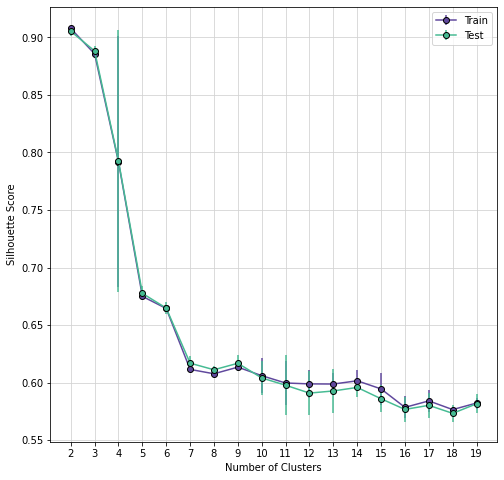

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
df_plot = df_silhouette_avg.groupby("n_cluster")
for i, set_label in enumerate(["train", "test"]):
    ax.errorbar(df_plot.mean().index, 
                df_plot.mean()[set_label + "_silhouette"].values, 
                df_plot.std()[set_label + "_silhouette"].values, label=set_label.title(),
               marker='o', mec='black', color = second_palette[i])
ax.set_xticks(arr_n_clusters), ax.set_xticklabels(arr_n_clusters)

ax.grid(True, color="lightgray")
ax.legend()
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")
filename = "silhouette_score.jpg"
#fig.savefig(os.path.join(plots_dir, filename), bbox_inches="tight")

In [37]:
n_clusters = 4
model = KMeans(n_clusters=n_clusters, random_state=0, verbose=False)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=False)

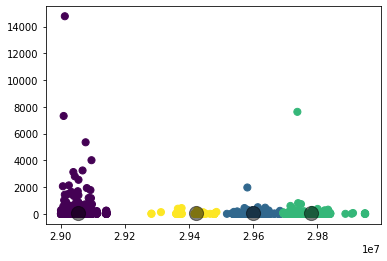

In [38]:
y_kmeans = model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [39]:
df_clusters_rewards = pd.DataFrame(model.cluster_centers_)
df_clusters_rewards.columns = df_cluster.columns
df_clusters_rewards = df_clusters_rewards.reset_index(drop=False).rename({"index": "cluster"},axis=1).set_index("cluster")
#df_clusters_rewards.drop(["income"], axis=1, inplace=True)
#df_clusters_rewards.to_csv(os.path.join(data_dir, "df_clusters_rewards.csv"), sep=';')
df_clusters_rewards

,id,Volume_2019,sfdc_tier,Buying_Average,0,1,2,3,4,5,6,7,8,9,10
cluster,,,,,,,,,,,,,,,
0,2.905467e+07,81.276914,1.377686,2.586911,5.461341,5.489403,5.375632,5.562827,5.594379,5.486474,5.373545,5.513900,5.429197,5.414819,5.432669
1,2.959905e+07,42.567165,1.391941,3.290571,5.462476,5.495694,5.374382,5.557929,5.597642,5.488346,5.371215,5.517324,5.429691,5.411486,5.426774
2,2.978095e+07,48.701582,1.250000,2.450025,5.463004,5.495010,5.373405,5.563926,5.596403,5.486102,5.370271,5.508918,5.436755,5.417740,5.436570
3,2.942202e+07,34.279305,1.361905,1.683607,5.467976,5.490910,5.380873,5.558730,5.586669,5.480666,5.382303,5.521595,5.427935,5.428193,5.432877


In [40]:
dfclusterrewardclone = df_clusters_rewards

In [41]:
del dfclusterrewardclone["id"]
del dfclusterrewardclone["Volume_2019"]
del dfclusterrewardclone["sfdc_tier"]
del dfclusterrewardclone["Buying_Average"]
#del dfclusterrewardclone["Became_Member_on"]
dfclusterrewardclone

,0,1,2,3,4,5,6,7,8,9,10
cluster,,,,,,,,,,,
0,5.461341,5.489403,5.375632,5.562827,5.594379,5.486474,5.373545,5.513900,5.429197,5.414819,5.432669
1,5.462476,5.495694,5.374382,5.557929,5.597642,5.488346,5.371215,5.517324,5.429691,5.411486,5.426774
2,5.463004,5.495010,5.373405,5.563926,5.596403,5.486102,5.370271,5.508918,5.436755,5.417740,5.436570
3,5.467976,5.490910,5.380873,5.558730,5.586669,5.480666,5.382303,5.521595,5.427935,5.428193,5.432877


In [42]:
from mab.greedy import EGreedyDecay

In [43]:

T = 30000
realizations = 20
epsilon = 0.3
beta = 0.001
print ('Starting MAB Experiment')

mean_reward_hist = pd.DataFrame(columns=[i for i in np.arange(T+1)] + ["realization"])

for realization in np.arange(realizations):
    progbar.update_progress(realization/realizations)
    last_reward = np.zeros(n_clusters)
    bandits = [EGreedyDecay(epsilon=epsilon, beta=beta) for _ in np.arange(n_clusters)]
    for i in np.arange(n_clusters):
        bandits[i].set_rewards(dfclusterrewardclone.loc[i])

    temp_mean_reward_hist = dict()
    for cluster in np.arange(n_clusters):
        temp_mean_reward_hist[cluster] = []

    for t in range(1,T):
        for cluster in np.arange(n_clusters):
            item = bandits[cluster].pull_arm(last_reward[cluster]) 
            last_reward[cluster] = bandits[cluster].get_reward(item) 
            temp_mean_reward_hist[cluster].append(bandits[cluster].mean_reward)

    temp_mean_reward_hist = pd.DataFrame(temp_mean_reward_hist).T
    temp_mean_reward_hist["realization"] = realization
    mean_reward_hist = pd.concat([mean_reward_hist, temp_mean_reward_hist], sort=False)
    
mean_reward_hist = mean_reward_hist.reset_index(drop=False).rename({"index": "cluster"}, axis=1)

Starting MAB Experiment
[0:00:51][##########] 95.00% 

Saving file at  EGreedyDecay_mean_average_reward_20_realizations.jpeg


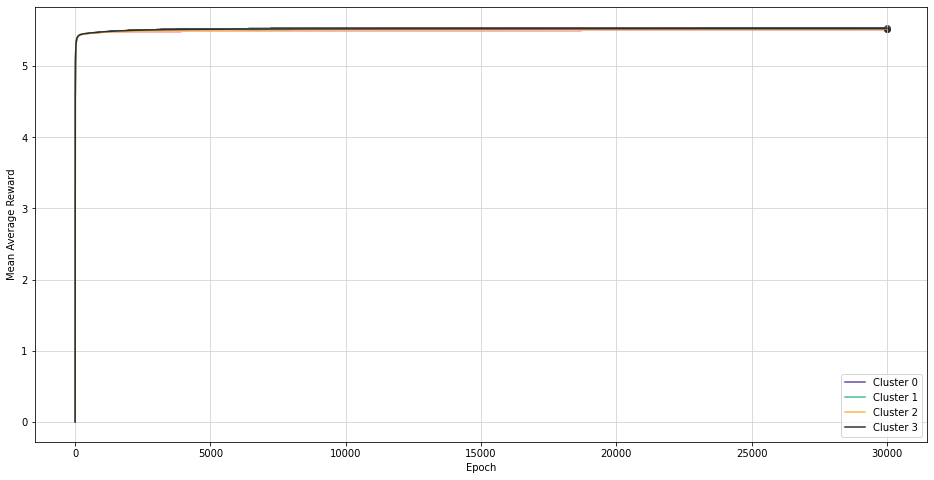

In [44]:
fig, ax = plt.subplots(figsize=(16,8))
df_plot_mean = mean_reward_hist.groupby(["cluster"]).mean()#[np.arange(0, T, 2000)]
df_plot_std = mean_reward_hist.groupby(["cluster"]).std()#[np.arange(0, T, 2000)]
for cluster in np.arange(n_clusters):
    ax.plot(df_plot_mean.iloc[cluster], 
            label = "Cluster " + str(cluster), 
            color=second_palette[cluster], alpha=5)
    
    ax.errorbar(df_plot_mean.columns,
                df_plot_mean.iloc[cluster],                
                df_plot_std.iloc[cluster], 
           color=second_palette[cluster], 
               alpha=.002, label=None)
    
    ax.scatter(x=[T], y=[np.array(df_plot_mean.loc[cluster])[-1]], 
               color=second_palette[cluster], label=None)
    
ax.set_xlabel("Epoch"), ax.set_ylabel("Mean Average Reward")
ax.legend()
ax.grid(True, color="lightgray")
filename = "{}_mean_average_reward_{}_realizations.jpeg".format(str(bandits[0]), realizations)
print ("Saving file at ", filename)

4 [  870.   837.   885.   834. 21360.   965.   794.   854.   868.   875.
   857.]
7 [  908.   890.   872.   852.   848.   826.   890. 21310.   876.   861.
   866.]
3 [  860.   891.   886. 21213.   838.   883.   889.   974.   853.   862.
   850.]
7 [  869.   851.   902.   865.   873.   942.   858. 21298.   857.   847.
   837.]


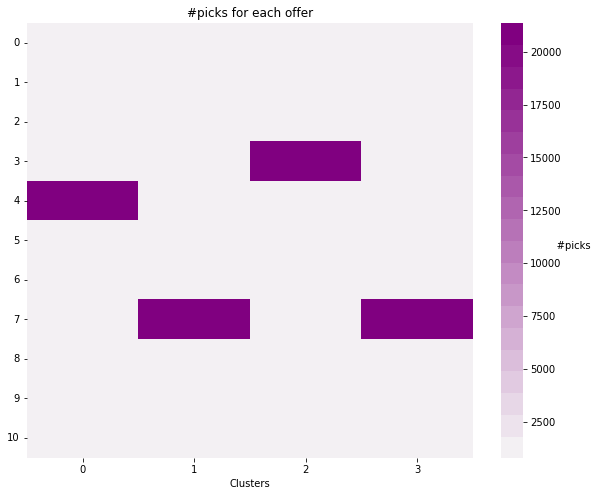

In [45]:
picks = np.zeros([n_clusters, bandits[0].k])
for cluster, bandit in enumerate(bandits):
    picks[cluster] = bandit.k_n
    print (np.argmax(bandit.k_n), bandit.k_n)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(picks.T, ax=ax, cmap=sns.light_palette("purple", n_colors=20))
ax.set_xlabel("Clusters")
ax.set_yticklabels([product for product in dfclusterrewardclone.columns], rotation = 0)
ax.collections[0].colorbar.set_label("     #picks", rotation=0)
ax.set_title("#picks for each offer")
filename = "picks_by_cluster.jpg"


**salvando resultados**

In [46]:
svdFile = open('svd', 'wb')
pickle.dump(svd, svdFile)
svdFile.close()

In [47]:
modelFile = open('model', 'wb')
pickle.dump(model, modelFile)
modelFile.close()

In [48]:
banditFile = open('bandit', 'wb')
pickle.dump(bandit, banditFile)
banditFile.close()

In [49]:
df_cluster

,id,Volume_2019,sfdc_tier,Buying_Average,0,1,2,3,4,5,6,7,8,9,10
0,29000310,0.480,0,1.338235,5.418118,5.453002,5.216137,5.291125,5.633998,5.449043,5.393788,5.642298,5.421112,5.244354,5.386150
1,29000419,0.450,1,1.851852,5.542815,5.477576,5.372561,5.727287,5.627557,5.466998,5.284363,5.532783,5.377390,5.235580,5.483265
2,29000430,270.970,1,0.606383,5.578803,5.713410,5.578774,5.594566,5.546859,5.602368,5.662894,5.452481,5.467249,5.386000,5.294818
3,29000485,29.610,2,0.160000,5.486726,5.332684,5.402234,5.478923,5.526481,5.441054,5.239447,5.519946,5.351748,5.262953,5.459011
4,29000699,0.420,2,13.500000,5.446984,5.490477,5.386438,5.480662,5.649841,5.395414,5.329721,5.527761,5.440439,5.515119,5.536905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,29949335,15.400,2,0.566667,5.534580,5.401470,5.450801,5.414853,5.644954,5.312599,5.392167,5.421803,5.272115,5.353720,5.486061
4564,29949357,0.420,1,3.714286,5.537063,5.590823,5.266528,5.431540,5.634651,5.402357,5.428706,5.566329,5.344997,5.561141,5.273329
4565,29949393,1.000,0,0.287234,5.501781,5.408756,5.322819,5.690241,5.374342,5.601270,5.551188,5.537140,5.552017,5.457346,5.370715
4566,29949511,48.853,2,0.968085,5.350056,5.380912,5.447724,5.481794,5.685901,5.401171,5.364364,5.596101,5.510048,5.253758,5.473740


In [50]:
file = open('model', 'rb')
kmeans = pickle.load(file)
file.close()

In [51]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=False)

In [52]:
puxarUsuarioEspecifico = df_cluster.values.astype('float')[4233]
puxarUsuarioEspecifico = puxarUsuarioEspecifico.reshape(1, -1)
cluster = kmeans.predict(puxarUsuarioEspecifico)[0]
print ("User cluster: ", cluster)

User cluster:  2


Getting cluster MAB

In [53]:
file = open('bandit', 'rb')
bandit = pickle.load(file)
file.close()

Loop desses funcoes toda vez que a acao compra ocorrer, se nao ocorrer compra com um usuario especifico, a funcao pull arm deve ocorrer novamente com a reward zerada

In [54]:
#Condicional ocorre novamente caso nao ocorra compra com a recomendacao
bandit_reward = 0

In [55]:
bandit_arm = bandit.pull_arm(bandit_reward)

In [56]:
#vizualizar o desconto escolhido e fornecer para o usuario
bandit_arm

7

In [57]:
#Se a compra for realizada com sucesso atraves do desconto gerado no bandit arm
bandit_reward = bandit.get_reward(bandit_arm)

In [58]:
bandit_reward

5.521595366257879